<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="120" /></center>

---
# **Table of Contents**
---

1.[**Introduction**](#Section1)<br>
2.[**Problem Statement**](#Section2)<br>
3.[**Installing and Importing libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Importing packages**](#Section32)    

4.[**Data Aquisition and Description**](#Section4)<br>
  - **4.1** [**Data Description**](#section41)<br>
  - **4.2** [**Data Information**](#section42)<br>
  
5.[**Data Pre-Processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>
  - **5.2** [**Pre-Processing**](#Section52)<br>
  
6.[**Exploratory Data Analysis**](#Section6)<br>
  - **6.1** [**What is the YoY status of sales?**](#Section61)<br>
  - **6.2** [**What type of bags are sold the most?**](#Section62)<br>
  - **6.3** [**Which type of Avocados are more in demand (Conventional or Organic)?**](#Section62)<br>
  - **6.4** [**What does the Average price distribution look like?**](#Section64)<br>
  - **6.5** [**How is Average price distributed over the months for Conventional and Organic Types?**](#Section65)<br>
  - **6.6** [**What are TOP 5 regions where Average price are very high?**](#Section66)<br>  
  - **6.7** [**In which year and for which region was the Average price the highest?**](#Section67)<br>
  
7.0 [**Feature Selection & Post Data Processing**](#Section68)<br>
  - **7.1** [**Feature Selection**](#Section71)<br>
  - **7.2** [**Post-Profiling Report**](#Section72)<br>
  - **7.3** [**Encoding Categorical Features**](#Section73)<br>
  - **7.4** [**Data Preparation**](#Section74)<br>
  
8.0 [**Model Development and Evaluation**](#Section80)<br>
  - **8.1** [**Linear Regression**](#Section81)<br>
  - **8.2** [**Decision Tree Regression**](#Section82)<br>
  - **8.3** [**Random Forest Regressor**](#Section83)<br>
  
9.0 [**Conclusion**](#Section90)<br>

---

<a name = Section1></a>
# **1. Introduction**


An avocado is a bright green fruit with a large pit and dark leathery skin. They’re also known as alligator pears or butter fruit. Avocados are a favorite of the produce section. They are the go-to ingredient for guacamole dips. And they are turning up in everything from salads and wraps to smoothies and even brownies.
Avocados have exploded in popularity in the United States over the last few decades. In 1985, domestic consumption was a meager 436 million pounds. That number has increased six-fold to over 2.7 billion pounds of the berry being consumed by Americans in 2020.

---
<a name = Section2></a>
# **2. Problem Statement**
---


Avacard-corp avocados are sourced from over 1000 growers owning over 65,000 acres across California, Mexico, Chile, and Peru.

With generations of experience growing, packing, and shipping avocados, they have a deep understanding of the avocado industry.

Their aim is to source quality fruit that’s sustainably grown and handled in the most efficient, shortest supply route possible.

They want to increase their supply throughout the United States and need to make sure that they are selling their products at the best possible price.

Avocado prices have rocketed in recent years by up to 129%, with the average national price in the US of a single Hass avocado reaching $2.10 in 2019, almost doubling in just one year.

Due to this uncertainty in the prices, the company is not able to sell their produce at the optimal price.

Your task is to predict the optimal price of the avocardo using the previous sales data of avocado according to different regions.

<center><img src="https://images.stockfreeimages.com/1829/sfi226w/18291838.jpg" width=400 height=240></center>  



---
<a name = Section3></a>
# 3. Installing & Importing Libraries
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [1]:
#!pip install -q datascience                   # Package that is required by pandas profiling
#!pip install -q pandas-profiling              # Library to generate basic statistics about data 
#!pip install pandas==0.25

<a name = Section32></a>
### 3.2. **Importing Packages** 

In [2]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import zscore
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------from sklearn import metrics, model_selection                       # For calculating the accuracy for the model

from sklearn.preprocessing import StandardScaler     
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
from sklearn.model_selection import train_test_split   
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

he dataset contains weekly retail scan data for National Retail Volume (units) and price.

Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

The column AveragePrice is the average price of a single avocado.

This is the data that we have to predict for future samples.

- The Data can be retrieved from the attached <a href = "https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv">**link**</a>.

| Column Name | Description |
| :-- | :--| 
|Id	|Unique identity of each observation|
|Date|The date of the observation|
|AveragePrice|The average price of a single avocado|
|Total Volume| Total number of avocados sold|
|4046	|Total number of avocados with PLU 4046 sold|
|4225	|Total number of avocados with PLU 4225 sold|
|4770	|Total number of avocados with PLU 4770 sold|
|Total Bags	|Total number of bags sold|
|Small Bags	|Total number of small bags sold|
|Large Bags	|Total number of large bags sold|
|XLarge Bags|	Total number of extra-large bags sold|
|type	|Type of an avocado (conventional or organic)|
|year	|The year of observation|
|Region|	The city or region of the observation|




In [148]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv')
print('Data Shape:', data.shape)
data.head()

Data Shape: (18249, 14)


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33000,64236.62000,1036.74000,54454.85000,48.16000,8696.87000,8603.62000,93.25000,0.00000,conventional,2015,Albany
1,1,2015-12-20,1.35000,54876.98000,674.28000,44638.81000,58.33000,9505.56000,9408.07000,97.49000,0.00000,conventional,2015,Albany
2,2,2015-12-13,0.93000,118220.22000,794.70000,109149.67000,130.50000,8145.35000,8042.21000,103.14000,0.00000,conventional,2015,Albany
3,3,2015-12-06,1.08000,78992.15000,1132.00000,71976.41000,72.58000,5811.16000,5677.40000,133.76000,0.00000,conventional,2015,Albany
4,4,2015-11-29,1.28000,51039.60000,941.48000,43838.39000,75.78000,6183.95000,5986.26000,197.69000,0.00000,conventional,2015,Albany


- The dataset contains **18249** rows and **14** columns. 

<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [4]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000
mean,24.23223,1.40598,850644.01301,293008.42453,295154.56836,22839.73599,239639.20206,182194.68670,54338.08814,3106.42651,2016.14790
std,15.48104,0.40268,3453545.35540,1264989.08176,1204120.40114,107464.06844,986242.39922,746178.51496,243965.96455,17692.89465,0.93994
min,0.00000,0.44000,84.56000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2015.00000
25%,10.00000,1.10000,10838.58000,854.07000,3008.78000,0.00000,5088.64000,2849.42000,127.47000,0.00000,2015.00000
50%,24.00000,1.37000,107376.76000,8645.30000,29061.02000,184.99000,39743.83000,26362.82000,2647.71000,0.00000,2016.00000
75%,38.00000,1.66000,432962.29000,111020.20000,150206.86000,6243.42000,110783.37000,83337.67000,22029.25000,132.50000,2017.00000
max,52.00000,3.25000,62505646.52000,22743616.17000,20470572.61000,2546439.11000,19373134.37000,13384586.80000,5719096.61000,551693.65000,2018.00000


**Observation:**

- We can observe that there are no null values and inconsistencies in the dataset.

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [5]:
data.info(verbose = True, memory_usage = 'deep', null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 5.0 MB


**Observation:**

- There are **no null values present** in this data set.

- **Each feature** seems to have **correct data type**.

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- It generates profile reports from a pandas DataFrame.



In [6]:
profile = ProfileReport(df=data)
profile.to_file(output_file='Pre Profiling Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


- For each column **statistics** are presented in an interactive HTML report.

- The data pre-profiling report can be retrieved from the attached <a href = "http://localhost:8888/view/Pre%20Profiling%20Report.html">**link**</a>.

**Observation:**

- Report shows that there are **14 features** out of which **10** are **numeric** and **4** are **categorical**.

- There are **no missing values** and **no duplicate values**.

- **Date** and **Region** have high cardinality and are uniformly distributed. 





<a name = Section52></a>
### **5.2 Pre Processing**

The Feature "Unnamed:0" is just a representation of the indexes and is of no use to us in this Analysis,so it can be removed.

In [149]:
data.drop('Unnamed: 0',axis=1,inplace=True)

Earlier in info we have seen that "Date" is object type not the date type. We have to change its type to date type.

In [150]:
data["Date"]= pd.to_datetime(data["Date"])
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Day'] = pd.DatetimeIndex(data['Date']).day

In [151]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33000,64236.62000,1036.74000,54454.85000,48.16000,8696.87000,8603.62000,93.25000,0.00000,conventional,2015,Albany,12,27
1,2015-12-20,1.35000,54876.98000,674.28000,44638.81000,58.33000,9505.56000,9408.07000,97.49000,0.00000,conventional,2015,Albany,12,20
2,2015-12-13,0.93000,118220.22000,794.70000,109149.67000,130.50000,8145.35000,8042.21000,103.14000,0.00000,conventional,2015,Albany,12,13
3,2015-12-06,1.08000,78992.15000,1132.00000,71976.41000,72.58000,5811.16000,5677.40000,133.76000,0.00000,conventional,2015,Albany,12,6
4,2015-11-29,1.28000,51039.60000,941.48000,43838.39000,75.78000,6183.95000,5986.26000,197.69000,0.00000,conventional,2015,Albany,11,29


---
<a name = Section6></a>
# **6. Exploratory Data Analysis**
---

<a name = Section61></a>
### **6.1 What is the year-on-year status of sales?**

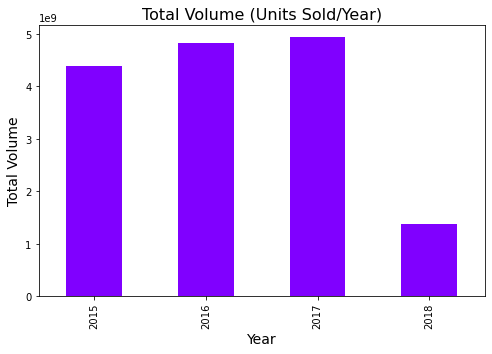

In [156]:
figure = plt.figure(figsize=[8,5])
data.groupby('year')['Total Volume'].sum().plot(kind='bar', cmap='rainbow')
plt.xticks(rotation=90)
plt.xlabel('Year',size=14)
plt.ylabel('Total Volume', size=14)
plt.title('Total Volume (Units Sold/Year)' ,size=16)
plt.savefig('Total Volume.png')

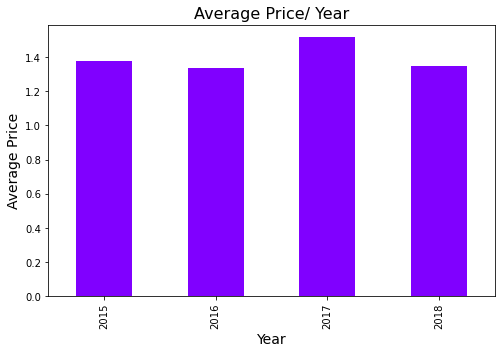

In [157]:
figure = plt.figure(figsize=[8,5])
data.groupby('year')['AveragePrice'].mean().plot(kind='bar', cmap='rainbow')
plt.xticks(rotation=90)
plt.xlabel('Year',size=14)
plt.ylabel('Average Price', size=14)
plt.title('Average Price/ Year' ,size=16)
plt.savefig('Average Price Per Year.png')

__Observation:__

- The total sales volume was the **highest in 2017 at 4943 million** and dropped to 1382 million in 2018.
- Average price was **the highest in 2017 at USD 1.5** and dropped to USD 1.3 in the year 2018.

<a name = Section62></a>
### **6.2 Which type of bags were sold the most?**

<Figure size 576x360 with 0 Axes>

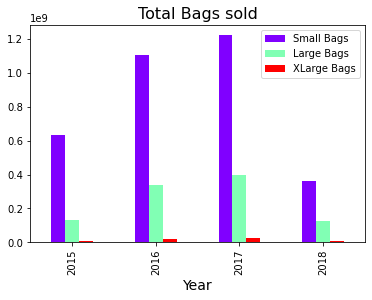

In [14]:
figure = plt.figure(figsize=[8,5])
data.groupby('year')[[ 'Small Bags','Large Bags', 'XLarge Bags']].sum().plot(kind='bar', cmap='rainbow')
plt.xlabel('Year',size=14)
plt.title('Total Bags sold' ,size=16)
plt.savefig('Total Bags sold.png')

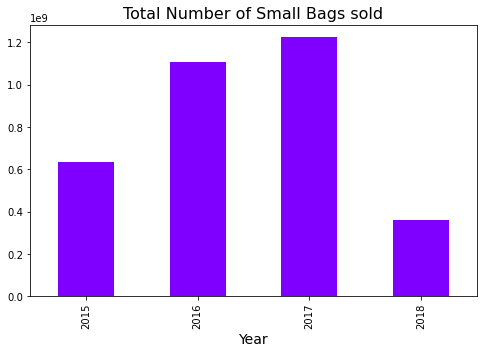

In [16]:
figure = plt.figure(figsize=[8,5])
data.groupby('year')['Small Bags'].sum().plot(kind='bar', cmap='rainbow')
plt.xlabel('Year',size=14)
plt.title('Total Number of Small Bags sold' ,size=16)
plt.savefig('Total Number of Small Bags sold.png')

__Observation__

- Amongst three bag sizes sold, small size of bags was the highest year-on-year. 
- The total sales of avocados with small bag size  was the highest in 2017 whereas XL bag size was sold the least. 
- Even during the drop in  sales in 2018, the most selling bag size was small.


<a name = Section63></a>
### **6.3 Which type of Avocados are more in demand (Coventional/Organic)?**
---

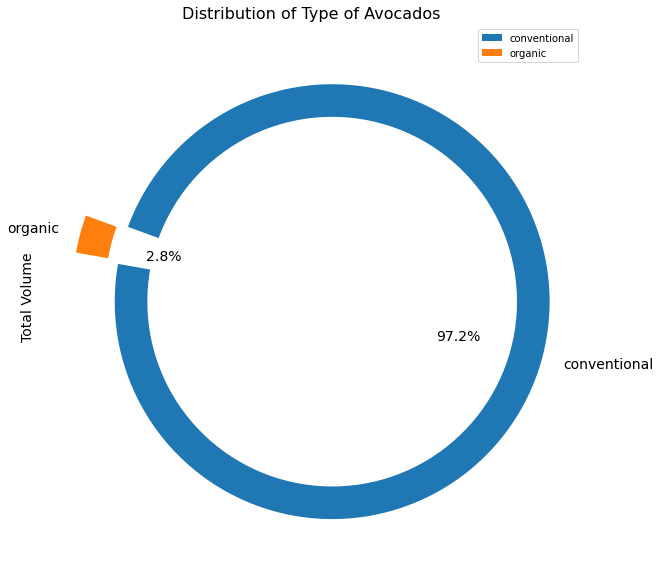

In [18]:
figure = plt.figure(figsize=[10, 10])
space = np.ones(2)/10
Type=data.groupby('type')['Total Volume'].agg('sum').plot(kind='pie', explode=space, fontsize=14, 
                                       autopct='%1.1f%%', wedgeprops=dict(width=0.15), 
                                        startangle=170, legend=True)
plt.ylabel(ylabel='Total Volume', size=14)
plt.title(label='Distribution of Type of Avocados', size=16)
plt.savefig('Distribution of Type of Avocados.png')

__Observation:__

- Total sales volume of conventional type of avocados is 97.2%(15087 million) whereas organic type has contributed only by 2.8%(436 million).  

<a name = Section64></a>
### **6.4 How does the yearwise distribution of avocados look like?**

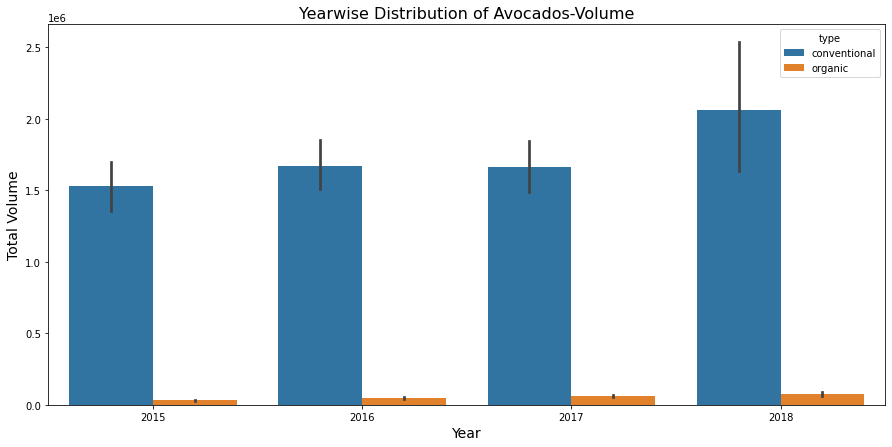

In [14]:
figure = plt.figure(figsize=[15, 7])
sns.barplot(data=data, x="year", y="Total Volume", hue="type")
plt.xlabel(xlabel='Year', size=14)
plt.ylabel(ylabel='Total Volume', size=14)
plt.title(label='Yearwise Distribution of Avocados-Volume', size=16)
plt.savefig('Yearwise Distribution of Avocados-Volume.png')

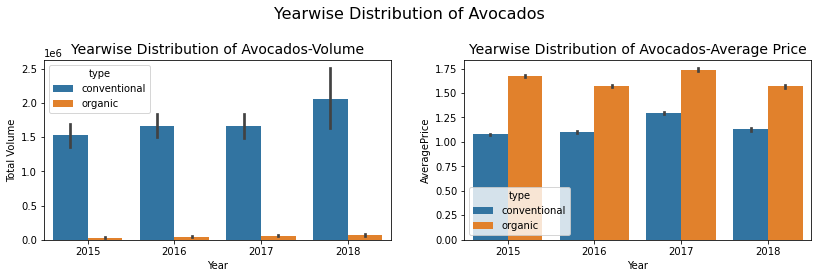

In [32]:
fig = plt.figure(figsize = [12, 4])
plt.subplot(1, 2, 1)
sns.barplot(data=data, x="year", y="Total Volume", hue="type")
plt.xlabel(xlabel='Year', size=10)
plt.ylabel(ylabel='Total Volume', size=10)
plt.title(label='Yearwise Distribution of Avocados-Volume', size=14)


plt.subplot(1, 2, 2)
sns.barplot(data=data, x="year", y="AveragePrice", hue="type")
plt.xlabel(xlabel='Year', size=10)
plt.ylabel(ylabel='AveragePrice', size=10)
plt.title(label='Yearwise Distribution of Avocados-Average Price', size=14)
plt.tight_layout(pad = 3.0)
plt.suptitle(t = 'Yearwise Distribution of Avocados', y = 1.02, size = 16)
plt.savefig('Yearwise distribution of Avocados.png')

__Observation__
- The Conventional type of avocados were sold higher each year with respect to volume. There is a significant increase in volume from 2017 to 2018.
- There was a drop in average price from 2017 to 2018.

<a name = Section65></a>
### 6.5 What is the impact of PLU code(size of avocado) on sales?

<Figure size 1080x504 with 0 Axes>

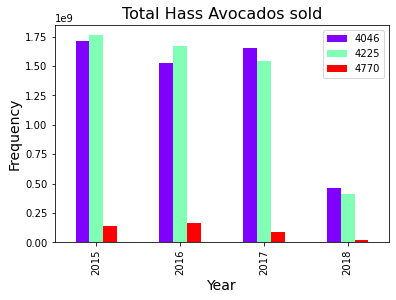

In [46]:
figure = plt.figure(figsize=[15, 7])
data.groupby('year')[[ '4046','4225', '4770']].sum().plot(kind='bar', cmap='rainbow')
plt.xlabel(xlabel='Year', size=14)
plt.ylabel(ylabel='Frequency', size=14)
plt.title(label='Total Hass Avocados sold', size=16)
plt.savefig('Total Hass Avocados sold.png')

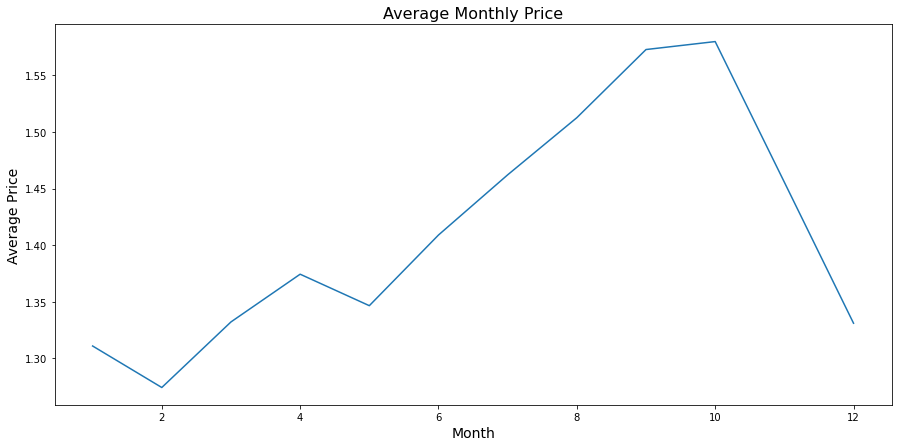

In [48]:
figure = plt.figure(figsize=[15, 7])
data.groupby('Month')['AveragePrice'].mean().plot(kind='line')
plt.xlabel(xlabel='Month', size=14)
plt.ylabel(ylabel='Average Price', size=14)
plt.title(label='Average Monthly Price', size=16)
plt.savefig('Average Monthly Price.png')

__Observation__

- **Most selling type is 4225** and the lowest one is 4770.
- Average price is highest during **Aug,Sep and Oct** and starts to drop Nov onwards.

<a name = Section66></a>
### 6.6 What are the Top 10 regions with the highest sales?

In [153]:
data['Revenue']=data['AveragePrice']*data['Total Volume']
R = data.groupby('region')['Revenue'].sum().sort_values(ascending=False)
R.drop(R.index[0], inplace=True)


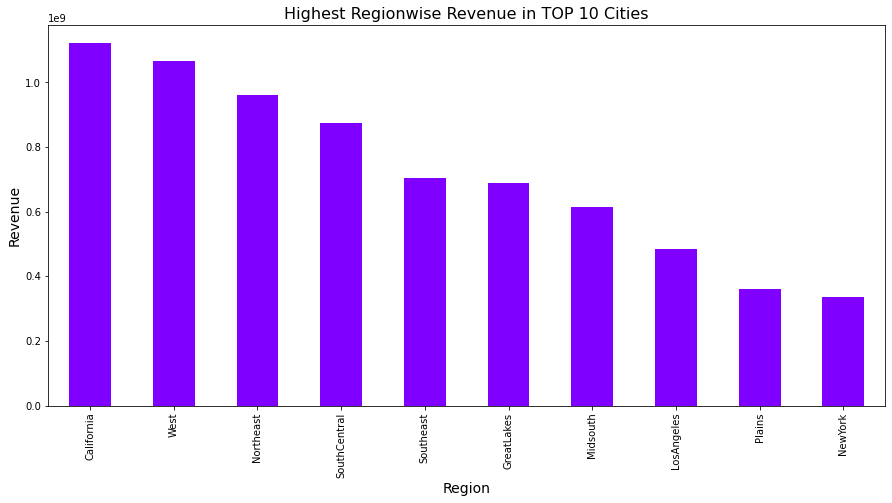

In [103]:
figure = plt.figure(figsize=[15, 7])
R.head(10).plot(kind='bar', cmap='rainbow')
plt.xticks(rotation=90)
plt.xlabel('Region',size=14)
plt.ylabel('Revenue', size=14)
plt.title('Highest Regionwise Revenue in TOP 10 Cities' ,size=16)
plt.savefig('Highest Regionwise Revenue in TOP 10 cities.png')

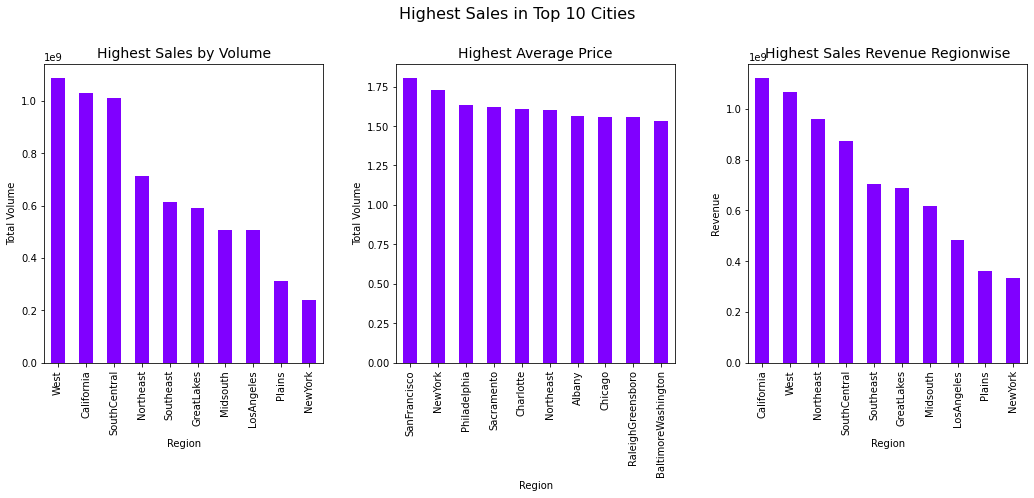

In [119]:
fig = plt.figure(figsize = [15, 7])
plt.subplot(1, 3, 1)
data.groupby('region')['Total Volume'].sum().sort_values(ascending=False)[1:11].plot(kind='bar', cmap='rainbow')
plt.xticks(rotation=90)
plt.xlabel('Region',size=10)
plt.ylabel('Total Volume', size=10)
plt.title('Highest Sales by Volume',size=14)

plt.subplot(1, 3, 2)
data.groupby('region')['AveragePrice'].mean().sort_values(ascending=False)[1:11].plot(kind='bar', cmap='rainbow')
plt.xticks(rotation=90)
plt.xlabel('Region',size=10)
plt.ylabel('Total Volume', size=10)
plt.title('Highest Average Price', size=14)

plt.subplot(1, 3, 3)
R[0:10].plot(kind='bar', cmap='rainbow')
plt.xticks(rotation=90)
plt.xlabel('Region',size=10)
plt.ylabel('Revenue', size=10)
plt.title('Highest Sales Revenue Regionwise' ,size=14)
plt.tight_layout(pad = 3.0)
plt.suptitle(t = 'Highest Sales in Top 10 Cities', y = 1.02, size = 16)
plt.savefig('Highest Sales in Top 10 Cities.png')

__Observation__

California has the highest demand (1121 million), followed by West(1066 million), Northeast(96 million), Southcentral(87 million), Southeast(70 million) and so on.


<a name = Section67></a>
### 6.7  How are the features in the dataset correlated to each other?


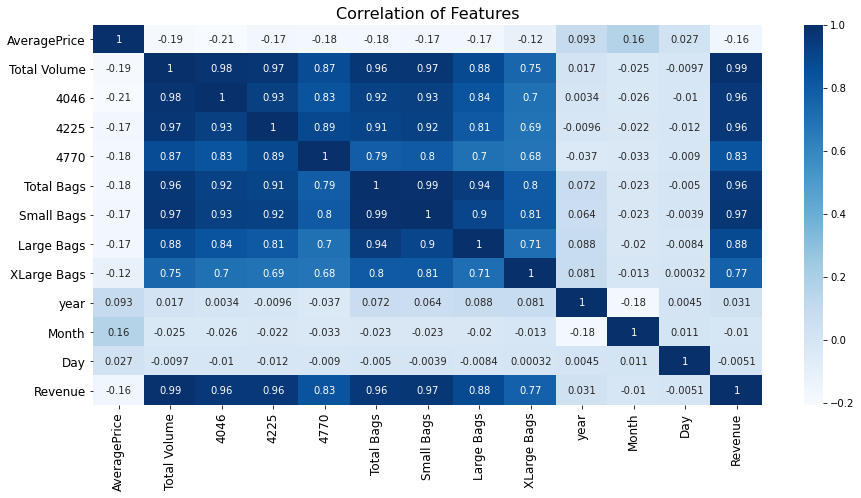

In [125]:
figure= plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),cmap='Blues',annot=True)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title(label='Correlation of Features', size=16)
plt.savefig('Correlation of Features.png')

__Observation__


From the above heatmap,it is observed that all the **features are not correleted with the Average Price column**, instead most of them are correlated with each other.

<a name = Section7></a>
# **7.  Feature Selection & Post Data Processing**

<a name = Section71></a>
### **7.1 Feature Selection**
---




In [127]:
data['region'].nunique()

54

In [128]:
data['type'].nunique()

2

As we can see we have 54 regions and 2 unique types, so it's going to be easy to to transform the type feature to dummies, but for the region its going to be a bit complex, so I decided to drop the entire column.
I will drop few columns like region and date.

In [155]:
df_final=pd.get_dummies(data.drop(['region','Date','Revenue'],axis=1),drop_first=True)
df_final.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33000,64236.62000,1036.74000,54454.85000,48.16000,8696.87000,8603.62000,93.25000,0.00000,2015,12,27,0
1,1.35000,54876.98000,674.28000,44638.81000,58.33000,9505.56000,9408.07000,97.49000,0.00000,2015,12,20,0
2,0.93000,118220.22000,794.70000,109149.67000,130.50000,8145.35000,8042.21000,103.14000,0.00000,2015,12,13,0
3,1.08000,78992.15000,1132.00000,71976.41000,72.58000,5811.16000,5677.40000,133.76000,0.00000,2015,12,6,0
4,1.28000,51039.60000,941.48000,43838.39000,75.78000,6183.95000,5986.26000,197.69000,0.00000,2015,11,29,0


<a name = Section72></a>
### **7.2 Post-Profiling Report**

- After doing **missing value Imputation**, **feature engineering**, **removing unwanted features** we will now look at the report again.

In [ ]:
profile = ProfileReport(df = df_final)
profile.to_file(output_file = 'Post Profiling Report.html')
print('Accomplished!')

- For each column **statistics** are presented in an interactive HTML report.

- The data pre-profiling report can be retrieved from the attached <a href = "http://localhost:8891/view/Post%20Profiling%20Report.html">**link**</a>.

Observation:

For full details after the data processing checkout the report.

<a name = Section73></a>
### **7.3 Data Preparation**



In [ ]:
df_final.columns

In [131]:
feature_cols = ['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day',
       'type_organic']
X = df_final[feature_cols]

In [132]:
y =data.AveragePrice
y.head()

0   1.33000
1   1.35000
2   0.93000
3   1.08000
4   1.28000
Name: AveragePrice, dtype: float64

<a name = Section74></a>
### **7.4 Splitting Data**

- Now we will **split** our **data** in **training** and **testing** part for further development.

In [133]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=42)

In [134]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (14599, 12)
y_train shape:  (14599,)

Test cases as below
X_test shape:  (3650, 12)
y_test shape:  (3650,)


<a name = Section8></a>
# **8. Model Development & Evaluation**


Now our data are ready. Lets apply our model which is going to be the Linear Regression because our target variable 'AveragePrice' is continuous.
Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable.

<a name = Section81></a>
### **8.1 Linear Regression**

In [135]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
pred=linreg.predict(X_test)

In [136]:
y_pred_train = linreg.predict(X_train)  
y_pred_test = linreg.predict(X_test)             

In [137]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred))) 

MAE: 0.2329713329170077
MSE: 0.0910880280536491
RMSE: 0.3018079323902026


The RMSE is low so we can say that we do have a good model, but lets check to be more sure.
Lets plot the y_test vs the predictions.


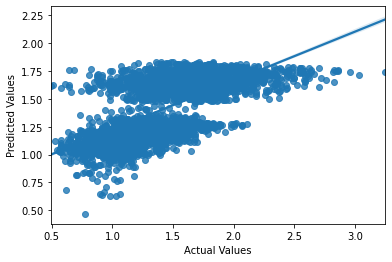

In [138]:
sns.regplot(y_test,y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig('Linear Regression.png')

__Observation__

As we can see that we don't have a straight line so this is not the best model we can apply on our data. 

<a name = Section82></a>
### **8.2 Decision Tree Regression**

In [139]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

In [140]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.1362821917808219
MSE: 0.044419150684931505
RMSE: 0.21075851272233703


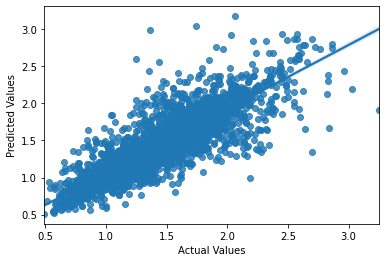

In [141]:
sns.regplot(x=y_test,y=pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig('Decision Tree Regression.png')

Here we can see that we nearly have a straight line, in other words its better than the Linear regression model with a lower RMSE score.

The RMSE is lower than the previous one we got with Linear Regression. Now I am going to try one last model to see if I can improve my predictions for this data which is the RandomForestRegressor.

<a name = Section83></a>
### **8.3 Random Forest Regressor**


In [142]:
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [143]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.10094342465753424
MSE: 0.02146415887945205
RMSE: 0.14650651480207988


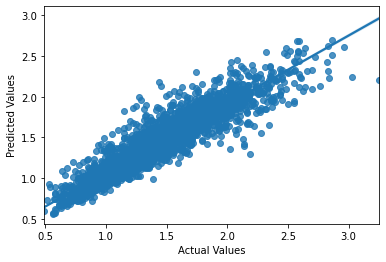

In [26]:
sns.regplot(x=y_test,y=pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig('Random Forest Regressor.png')

__Observation__

The RMSE is lower than the two previous models.The residuals looked to be normally distributed and that's really a good sign which means that this model was a correct choice for the data.

<a name = Section84></a>
### **8.4 Actual Vs Predicted Sample - Random forest regressor**

.

,Y Test,Pred
8604,0.82000,0.93350
2608,0.97000,0.98170
14581,1.44000,1.41950
4254,0.97000,0.89880
16588,1.45000,1.44220


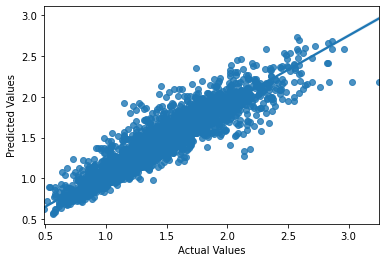

In [144]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.regplot(x='Y Test',y='Pred',data=data)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig('Actual Vs Predicted.png')
data.head()

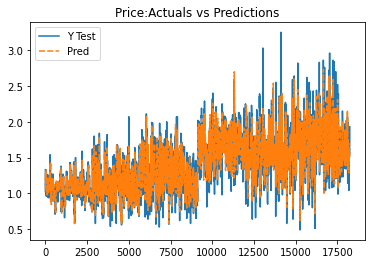

In [145]:
sns.lineplot(data=data,legend='auto')
plt.title('Price:Actuals vs Predictions')
plt.savefig('Actual Vs Predicted.png')

<a name = Section9></a>
# **9. Conclusion**


- I **studied in breif about the data**, its **characteristics** and its **distribution**.

- I **investigated about the features** which to **retain** and which to **discard**.
- I came to know through analysis which model will be work with better **accuracy** with the help of **low residual and RMSE scores**.
- This project helped me gain insights and how I should go with flow, which model to choose first and go step by step to attain results with good accuracy. Also I got to know where to use Linear Regression, Decision Tree Regression and other applicable and required models to fine tune the predictions.